## Data Preprocessing

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [2]:
# read CSV file
df=pd.read_csv('../../data/kc_house_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Drop Outliers

/Users/brookesmyth/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='price'>

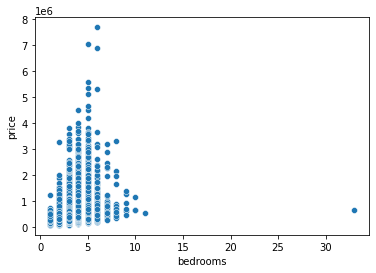

In [5]:
# look for outliers
sns.scatterplot(df['bedrooms'],df['price'])


In [6]:
# look for the specifics of that outlier
df.loc[df['bedrooms'] == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,NO,NONE,...,7 Average,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


In [7]:
# drop it from our dataset because it makes no sense 
# to have 33 bedrooms and 1.75 bathrooms
df=df.drop(15856)

In [8]:
# check to see if we droped the right one
df.describe()
#we dropped the right one because max bedrooms is 11 now

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159600e+04,2.159600e+04,21596.000000,21596.000000,21596.000000,2.159600e+04,21596.000000,21596.000000,21596.000000,17754.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000
mean,4.580575e+09,5.402920e+05,3.371828,2.115843,2080.343165,1.509983e+04,1.494119,1788.631506,1971.000787,83.641489,98077.950685,47.560087,-122.213977,1986.650722,12758.656649
std,2.876764e+09,3.673760e+05,0.904114,0.768998,918.122038,4.141355e+04,0.539685,827.763251,29.375460,399.957185,53.514040,0.138552,0.140725,685.231768,27275.018316
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308950e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068550e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


/Users/brookesmyth/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sqft_living', ylabel='price'>

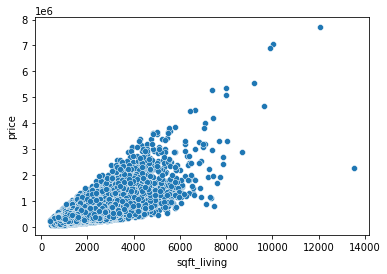

In [9]:
sns.scatterplot(df['sqft_living'],df['price'])

In [10]:
# look for the outlier on the far right
df.loc[df['sqft_living']== 13540].T

,12764
id,1225069038
date,5/5/2014
price,2.28e+06
bedrooms,7
bathrooms,8
sqft_living,13540
sqft_lot,307752
floors,3
waterfront,NO
view,EXCELLENT


In [10]:
# this one looks very far off so we are going to drop it
df.drop(12764)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [12]:
# check the one with the highest price
df.loc[df['price'] == df['price'].max()].T
# this one makes sense and it also look like it's following the trend

,7245
id,6762700020
date,10/13/2014
price,7.7e+06
bedrooms,6
bathrooms,8
sqft_living,12050
sqft_lot,27600
floors,2.5
waterfront,NO
view,GOOD


## Use Dictionary Mapping on Condition and Grade

In [11]:
# View column has missing values so we are going to figure out what to do with it
df['view'].value_counts()
# None seems to indicate no views
# This looks like ordinal data so we are going to use OrdinalEncoder for it

NONE         19421
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [14]:
# Make views numeric
view_dict = {'NONE': 1,
            'FAIR': 2,
             'AVERAGE':3,
            'GOOD': 4,
            'EXCELLENT': 5}
df['view'].replace(view_dict, inplace=True)

In [16]:
# check to see if there's null values in the column
df['view'].isna().sum()

63

In [12]:
# fill in the null values with None, assuming sometimes people don't fill it in when there's minimum view
df['view'] = df['view'].fillna('NONE')

In [13]:
# check to see if there's null values in the column
df['condition'].isna().sum()

0

In [20]:
df['condition'].value_counts()

3    14020
4     5677
5     1700
2      170
1       29
Name: condition, dtype: int64

In [18]:
# Create dictionary for mapping onto condition
cond_dict = {'Poor': 1,
            'Fair': 2,
            'Average': 3,
             'Good': 4,
            'Very Good': 5}
            

In [19]:
# Replace categorical values with numeric values
df['condition'].replace(cond_dict, inplace=True)

In [22]:
df['grade'].value_counts().sort_index()

10 Very Good     1134
11 Excellent      399
12 Luxury          89
13 Mansion         13
3 Poor              1
4 Low              27
5 Fair            242
6 Low Average    2038
7 Average        8973
8 Good           6065
9 Better         2615
Name: grade, dtype: int64

In [21]:
# mapped dicitonary to change grade to numeric values
grade_dict = {'3 Poor': 3,
             '4 Low': 4,
             '5 Fair': 5,
             '6 Low Average': 6,
             '7 Average': 7,
             '8 Good': 8,
             '9 Better': 9,
             '10 Very Good': 10,
             '11 Excellent': 11,
             '12 Luxury': 12,
             '13 Mansion': 13}
df['grade'].replace(grade_dict, inplace=True)

In [22]:
df['grade'].value_counts()

7     8973
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

In [23]:
df['waterfront'].value_counts()

NO     19074
YES      146
Name: waterfront, dtype: int64

In [24]:
df['waterfront'].isna().sum()

2376

In [25]:
df.drop('id', axis=1, inplace=True)

In [26]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [27]:
X = df.drop('price', axis=1)
y= df['price']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [29]:
X_train

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2358,3/25/2015,3,1.00,1040,8122,1.0,NO,NONE,5,7,1040,0.0,1971,0.0,98198,47.3731,-122.312,1470,8676
6405,3/4/2015,3,2.50,1880,4499,2.0,NO,NONE,3,8,1880,0.0,1993,0.0,98029,47.5664,-121.999,2130,5114
937,10/7/2014,3,2.50,2020,6564,1.0,NO,NONE,3,7,1310,710.0,1994,0.0,98042,47.3545,-122.158,1710,5151
19076,1/16/2015,5,4.00,4720,493534,2.0,NO,NONE,5,9,3960,760.0,1975,0.0,98027,47.4536,-122.009,2160,219542
15201,3/30/2015,2,2.00,1430,3880,1.0,NO,NONE,4,7,1430,0.0,1949,0.0,98117,47.6844,-122.392,1430,3880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,9/15/2014,3,2.50,2230,5800,2.0,NO,NONE,3,7,2230,0.0,2004,0.0,98065,47.5308,-121.847,2230,6088
21576,4/16/2015,3,2.25,1190,1200,3.0,NO,NONE,3,8,1190,0.0,2008,NaN,98103,47.6542,-122.346,1180,1224
5390,7/21/2014,4,1.50,1530,9000,1.0,NO,NONE,4,6,1530,0.0,1976,0.0,98014,47.6492,-121.908,1520,8500
860,6/20/2014,1,0.75,380,15000,1.0,NO,NONE,3,5,380,0.0,1963,0.0,98168,47.4810,-122.323,1170,15000


In [30]:
train_df = pd.concat([X_train, y_train], axis=1)
train_df

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
2358,3/25/2015,3,1.00,1040,8122,1.0,NO,NONE,5,7,1040,0.0,1971,0.0,98198,47.3731,-122.312,1470,8676,234000.0
6405,3/4/2015,3,2.50,1880,4499,2.0,NO,NONE,3,8,1880,0.0,1993,0.0,98029,47.5664,-121.999,2130,5114,529000.0
937,10/7/2014,3,2.50,2020,6564,1.0,NO,NONE,3,7,1310,710.0,1994,0.0,98042,47.3545,-122.158,1710,5151,253000.0
19076,1/16/2015,5,4.00,4720,493534,2.0,NO,NONE,5,9,3960,760.0,1975,0.0,98027,47.4536,-122.009,2160,219542,745000.0
15201,3/30/2015,2,2.00,1430,3880,1.0,NO,NONE,4,7,1430,0.0,1949,0.0,98117,47.6844,-122.392,1430,3880,545000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,9/15/2014,3,2.50,2230,5800,2.0,NO,NONE,3,7,2230,0.0,2004,0.0,98065,47.5308,-121.847,2230,6088,440000.0
21576,4/16/2015,3,2.25,1190,1200,3.0,NO,NONE,3,8,1190,0.0,2008,NaN,98103,47.6542,-122.346,1180,1224,475000.0
5390,7/21/2014,4,1.50,1530,9000,1.0,NO,NONE,4,6,1530,0.0,1976,0.0,98014,47.6492,-121.908,1520,8500,299800.0
860,6/20/2014,1,0.75,380,15000,1.0,NO,NONE,3,5,380,0.0,1963,0.0,98168,47.4810,-122.323,1170,15000,245000.0


In [31]:
import plotly.express as px

In [32]:
loc_df = train_df[['lat', 'long', 'price']]
loc_df.head()

,lat,long,price
2358,47.3731,-122.312,234000.0
6405,47.5664,-121.999,529000.0
937,47.3545,-122.158,253000.0
19076,47.4536,-122.009,745000.0
15201,47.6844,-122.392,545000.0


In [42]:
fig = px.scatter_mapbox(loc_df[loc_df['price'] < 2000000],
                       lat='lat',
                       lon='long',
                       color='price',
                       zoom=8)
fig.update_layout(mapbox_style='open-street-map')

fig.show()

In [33]:
import math

In [34]:
x2 = 47.6062
y2 = 122.3321
loc_df['SeatleLat'] = x2
loc_df['SeatleLong'] = y2

<ipython-input-34-6089d9b4e7a7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loc_df['SeatleLat'] = x2
<ipython-input-34-6089d9b4e7a7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loc_df['SeatleLong'] = y2


In [35]:
def get_distance(x2, x1, y2, y1):
    math.hypot(x2-x1,y2-y1)

In [37]:
loc_df.head()

,lat,long,price,SeatleLat,SeatleLong
2358,47.3731,-122.312,234000.0,47.6062,122.3321
6405,47.5664,-121.999,529000.0,47.6062,122.3321
937,47.3545,-122.158,253000.0,47.6062,122.3321
19076,47.4536,-122.009,745000.0,47.6062,122.3321
15201,47.6844,-122.392,545000.0,47.6062,122.3321


In [65]:
loc_df.drop('distance', inplace=True, axis=1)


/Users/brookesmyth/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [67]:
loc_df.drop('2distance', inplace=True, axis=1)

/Users/brookesmyth/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [78]:
from sklearn.metrics.pairwise import haversine_distances
from math import radians
from sklearn.neighbors import DistanceMetric

In [93]:
haversine_vectorize(loc_df['Seatle_long_rad'],
                    loc_df['Seatle_lat_rad'],
                    loc_df['long_rad'],
                    loc_df['lat_rad'])

2358     4810.981928
6405     4810.309676
937      4816.637665
19076    4815.941754
15201    4792.223817
            ...     
11964    4816.773262
21576    4795.200562
5390     4808.699660
860      4804.983828
15795    4802.236876
Length: 16197, dtype: float64

In [ ]:
get_distance()

In [73]:
loc_df['lat_rad'] = np.radians(loc_df['lat'])
loc_df['long_rad'] = np.radians(loc_df['long'])
loc_df['Seatle_lat_rad'] = np.radians(loc_df['SeatleLat'])
loc_df['Seatle_long_rad'] = np.radians(loc_df['SeatleLong'])

<ipython-input-73-758c6b817c6d>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-73-758c6b817c6d>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-73-758c6b817c6d>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-73-758c6b8

In [79]:
dist = DistanceMetric.get_metric('haversine')

In [92]:


def haversine_vectorize(lon1, lat1, lon2, lat2):

    newlon = lon2 - lon1
    newlat = lat2 - lat1

    haver_formula = np.sin(newlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(newlon/2.0)**2

    dist = 2 * np.arcsin(np.sqrt(haver_formula ))
    miles = 3958 * dist #6367 for distance in KM for miles use 3958
    return miles

In [ ]:
haversine_vectorize()